Pandas is an open source Python library for data analysis. 

Python has always been great for prepping and munging data, but it's never been great for analysis - you'd usually end up using R or loading it into a database and using SQL (or worse, Excel). Pandas solves this problem making Python great for data analysis. 

Another amazing package to deal (in a fast way) with data is Numpy. 
NumPy is the fundamental package for scientific computing with Python, which can be also used as an efficient multi-dimensional container of generic data.

[ How to install Pandas https://pandas.pydata.org/pandas-docs/stable/install.html ]
With pip:
- pip install numpy
- pip install pandas
N.B It might be that other packages are required, the use of Anaconda as package manager could help.

In [2]:
# Importing Pandas, Numpy and Matplot Lib ()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_columns', 50)
%matplotlib inline

Pandas introduces two new data structures to Python, Series and DataFrame 

A Series is a one-dimensional object similar to an array, list, or column in a table. It will assign a labeled index to each item in the Series. By default, each item will receive an index label from 0 to N, where N is the length of the Series minus one.

A DataFrame is a tablular data structure comprised of rows and columns.

In [107]:
# Load a dataset with pandas, which will load the data in a DataFrame object
df = pd.read_csv("data/foursquare_Manhattan_100.csv", index_col=[0], usecols=['index','name','categories','checkin','usercount','boros'])

In [4]:
# Let's explore the dataset
df.head(5)

,name,categories,checkin,usercount,boros
index,,,,,
5,Statue of Liberty Gift Shop,Shop & Service:Souvenir Shop,1281.0,1164.0,Manhattan
2,Liberty Island Food Court,Outdoors & Recreation:Park,225.0,217.0,Manhattan
3,Statue Of Liberty Trailer Park,Professional & Other Places:Office:Coworking S...,88.0,4.0,Manhattan
1,National Parks Services,Professional & Other Places:Government Buildin...,136.0,130.0,Manhattan
6,National Parks Services,Professional & Other Places:Government Buildin...,136.0,130.0,Manhattan


In [5]:
# What kind of data do we have?
df.dtypes

name           object
categories     object
checkin       float64
usercount     float64
boros          object
dtype: object

In [6]:
# A quick overview on the dataframe
df.describe()

,checkin,usercount
count,7.709300e+04,77093.000000
mean,1.151432e+03,513.767125
std,7.738937e+03,3082.508528
min,1.000000e+00,1.000000
25%,1.000000e+01,4.000000
50%,5.700000e+01,18.000000
75%,4.180000e+02,129.000000
max,1.099038e+06,264182.000000


In [68]:
# Size
len(df)

77093

In [7]:
# A column of a Dataframe can be seen as a Series

users = df['usercount']
users.head(10)

index
5     1164.0
2      217.0
3        4.0
1      130.0
6      130.0
7      594.0
24    1109.0
15    9456.0
8        4.0
4       53.0
Name: usercount, dtype: float64

In [31]:
# We can also calculate some stats on a series

print "Sum of the users: " + str(users.sum())
print "Mean of the users: " + str(users.mean())
print "Standard deviation of the users: " + str(users.std())
print "Min number of the users: " + str(users.min())
print "Max number of the users: " + str(users.max())
print "75% percentile: " + str(np.percentile(users, 75))

Sum of the users: 39607849.0
Mean of the users: 513.76712542
Standard deviation of the users: 3082.50852756
Min number of the users: 1.0
Max number of the users: 264182.0
75% percentile: 129.0


In [9]:
users[users > 50000]

index
21        67293.0
1609      50628.0
1396     121050.0
2091      52547.0
4623     111730.0
5905      94915.0
7968      50228.0
16369     71651.0
20004    145375.0
20003    189710.0
21185     67193.0
26439     55835.0
25932     84178.0
26004     84801.0
28170     54834.0
28701     54834.0
28173     62217.0
29376    264182.0
32082    119554.0
47570     73234.0
33342    117893.0
34120     53427.0
38048     60567.0
40412     62360.0
39288     69681.0
41531    154566.0
43545    153587.0
44475    195199.0
45662    131224.0
48381    138253.0
1390     145975.0
1664     145975.0
1943     160702.0
4135      53768.0
Name: usercount, dtype: float64

In [20]:
users[users < 200].count()

61004

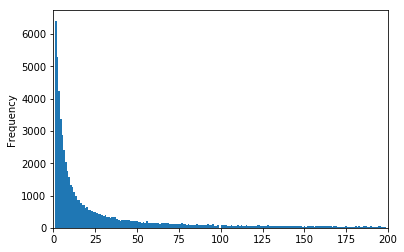

In [36]:
users[users < 200].plot(kind='hist',bins=200, xlim=[0,200])

In [22]:
# What is the law for the checkin?
checkin = df['checkin']

In [32]:
print "Sum of the checkin: " + str(checkin.sum())
print "Mean of the checkin: " + str(checkin.mean())
print "Standard deviation of the checkin: " + str(checkin.std())
print "Min number of the checkin: " + str(checkin.min())
print "Max number of the checkin: " + str(checkin.max())
print "75% percentile: " + str(np.percentile(checkin, 75))

Sum of the checkin: 88767313.0
Mean of the checkin: 1151.43155669
Standard deviation of the checkin: 7738.93664269
Min number of the checkin: 1.0
Max number of the checkin: 1099038.0
75% percentile: 418.0


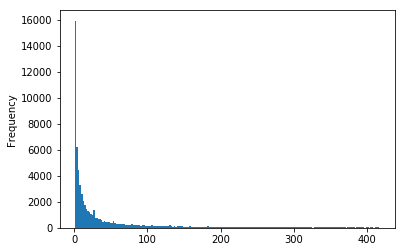

In [33]:
users[users < 418].plot(kind='hist',bins=200)

In [45]:
# What are the most visited places??

id_max_users = df['usercount'].argmax()
df.loc[id_max_users]

name                         Times Square
categories    Outdoors & Recreation:Plaza
checkin                            552022
usercount                          264182
boros                           Manhattan
Name: 29376, dtype: object

In [46]:
id_max_checkin = df['checkin'].argmax()
df.loc[id_max_checkin]

,name,categories,checkin,usercount,boros
index,,,,,
20003,New York Penn Station,Travel & Transport:Train Station,1099038.0,189710.0,Manhattan
20003,Tom's Dog Run,Outdoors & Recreation:Dog Run,2641.0,1492.0,Manhattan


In [51]:
df.corr(method='pearson')

,checkin,usercount
checkin,1.000000,0.873896
usercount,0.873896,1.000000


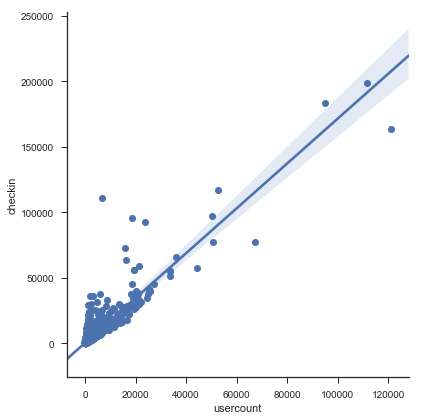

In [114]:
import seaborn as sns
sns.set(style="ticks")

df_small = df.head(10000)

# Show the results of a linear regression within each dataset
ax = sns.lmplot(x="usercount", y="checkin", data=df_small,palette="muted", size=6,
           scatter_kws={"s": 50, "alpha": 1})

#ax.set(xscale="log", yscale="log",xlim=[0.1,100000])

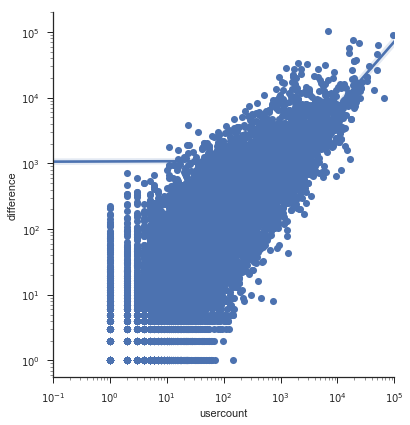

In [117]:
df_small.loc[:,'difference'] = (df_small['checkin']-df_small['usercount'])+1

ax = sns.lmplot(x="usercount", y="difference", data=df_small,palette="muted", size=6,
           scatter_kws={"s": 50, "alpha": 1})

ax.set(xscale="log", yscale="log",xlim=[0.1,100000])

In [119]:
def split(df):
    return df.split(":")[0]
    
df.loc[:,'category1'] = df['categories'].head(10).apply(split)

In [120]:
df.head(10)

,name,categories,checkin,usercount,boros,category1
index,,,,,,
5,Statue of Liberty Gift Shop,Shop & Service:Souvenir Shop,1281.0,1164.0,Manhattan,Shop & Service
2,Liberty Island Food Court,Outdoors & Recreation:Park,225.0,217.0,Manhattan,Outdoors & Recreation
3,Statue Of Liberty Trailer Park,Professional & Other Places:Office:Coworking S...,88.0,4.0,Manhattan,Professional & Other Places
1,National Parks Services,Professional & Other Places:Government Buildin...,136.0,130.0,Manhattan,Professional & Other Places
6,National Parks Services,Professional & Other Places:Government Buildin...,136.0,130.0,Manhattan,Professional & Other Places
7,Statue of Liberty Crown Cafe,Food:American Restaurant,702.0,594.0,Manhattan,Food
24,Statue Cruises Liberty Island Terminal,Travel & Transport:Pier,1283.0,1109.0,Manhattan,Travel & Transport
15,Liberty Island,Outdoors & Recreation:Island,10108.0,9456.0,Manhattan,Outdoors & Recreation
8,Evelyn Hill Inc,Shop & Service:Gift Shop,4.0,4.0,Manhattan,Shop & Service


In [121]:
df.groupby('category1').size()

category1
Food                            3
Outdoors & Recreation           6
Professional & Other Places    12
Shop & Service                  6
Travel & Transport              3
dtype: int64

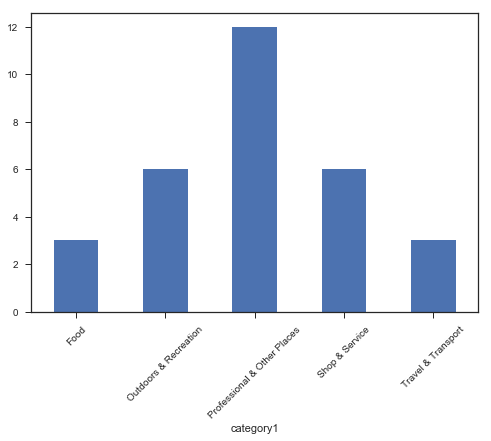

In [123]:
df.groupby('category1').size().plot(kind='bar',rot=45)